<a href="https://colab.research.google.com/github/egorostap/other_projects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_02_11_2021%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 день - Анализ данных

Данные о погоде: https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)
 
 
**Конкурсное ДЗ:**.
 
1) Протестировать качество модели DecisionTreeRegressor + cos(день в году)
 
2) Поиграть с признаками - добавить больше признаков в модель (sin, sin & cos, dayofyear & cos и т.п.)
 
_Сданной считается работа, в которой проделаны эксперименты хотя бы по одному из пунктов, даже если код не удалось заставить работать  :)_

 
**Дедлайн - 18:00 по МСК**
 
ДЗ сдается через Google Form, закрепленную в Телеграм-чате в ввиде ссылки на файл, аналогичный тому, в котором работали сегодня
 
Ссылка на вебинары:
 
1 день:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-znakomimsya-s-python011121/
 
2 день:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-tekhniki-issledovaniya021121/

3 день: https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-podvodim-itogi031121/

# Ссылки на ресурсы
[Визуализация работы Дерева Решений (Decision Tree)](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)


[Документация pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

[Документация sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[Документация sklearn DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# Для доп. чтения:
[Wikipedia: Метод наименьших квадратов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2)

[Что внутри у нейросети: Visualizing Weights - distill.pub](https://distill.pub/2020/circuits/visualizing-weights/)

# Инструкция по отправке ДЗ
Вы выполняете ДЗ в своем файле на Google Диск (можно скопировать этот или создать новый). После чего открываете доступ на чтение по ссылке и отправляете ссылку в Google Форму, которая закреплена в Telegram чате. Файлы без доступа на чтение проверить не получится.

In [1]:
# Скачивание файла (подставить свою ссылку)
!wget -O "weather.xls.gz" "http://93.90.217.252/download/files.synop/27/27612.01.01.2016.18.10.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2021-11-06 05:55:32--  http://93.90.217.252/download/files.synop/27/27612.01.01.2016.18.10.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 93.90.217.252:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403974 (1.3M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.34M   845KB/s    in 1.6s    

2021-11-06 05:55:34 (845 KB/s) - ‘weather.xls.gz’ saved [1403974/1403974]



In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Считываем Excel-таблицу в переменную data
data = pd.read_excel('weather.xls', skiprows=6)
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['dates'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [4]:
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
0,18.10.2021 18:00,4.1,743.6,757.4,0.4,86.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,"90 или более, но не 100%",Ливневый(ые) дождь(и).,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",17.0,1.9,3,12.0,NaN,NaN,NaN,NaN,2021-10-18 18:00:00
1,18.10.2021 15:00,6.1,743.2,756.9,0.2,63.0,"Ветер, дующий с запада",1,NaN,NaN,50%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,50%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20.0,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 15:00:00
2,18.10.2021 12:00,5.1,743.0,756.7,1.3,85.0,"Ветер, дующий с запада",1,NaN,NaN,70 – 80%.,Ливневый(ые) дождь(и).,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20.0,2.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 12:00:00
3,18.10.2021 09:00,5.8,741.7,755.5,-0.9,93.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,Ливневый(ые) дождь(и) слабый(ые) в срок наблюд...,Ливень (ливни).,Облака покрывали более половины неба в течение...,5.8,NaN,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,8.0,4.7,0.6,12.0,Поверхность почвы влажная.,4.0,NaN,NaN,2021-10-18 09:00:00
4,18.10.2021 06:00,6.2,742.6,756.3,-1.1,84.0,"Ветер, дующий с юга",1,NaN,NaN,100%.,,NaN,NaN,6.1,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,20.0,3.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-18 06:00:00
5,18.10.2021 03:00,7.1,743.7,757.3,-0.9,82.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,20.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 03:00:00
6,18.10.2021 00:00,6.7,744.6,758.3,-0.7,83.0,"Штиль, безветрие",0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 00:00:00
7,17.10.2021 21:00,6.6,745.3,759.0,0.1,82.0,"Штиль, безветрие",0,NaN,NaN,60%.,,NaN,NaN,NaN,8.0,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20.0,3.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-17 21:00:00
8,17.10.2021 18:00,7.9,745.2,758.8,-0.4,76.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,1000-1500,NaN,NaN,20.0,3.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-17 18:00:00
9,17.10.2021 15:00,7.8,745.6,759.3,-0.6,73.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,20.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-17 15:00:00


In [5]:
data.columns  # Атрибут объекта - список колонок

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'dates'],
      dtype='object')

In [6]:
# Pandas DataFrame (наша data) - это таблицы, которые хранятся по столбцам, т.е. если мы хотим получить данные о температуре 
# в строке 15, мы в квадратных скобках пишем сначала название колонки, потом номер строки
print('Температура в строке 15 =', data['T'][15])
data['T']

Температура в строке 15 = 8.0


0         4.1
1         6.1
2         5.1
3         5.8
4         6.2
         ... 
16933   -15.0
16934   -14.8
16935   -14.6
16936   -14.0
16937   -12.9
Name: T, Length: 16937, dtype: float64

In [7]:
data['T'].quantile(0.05), data['T'].quantile(0.95)

(-9.8, 23.8)

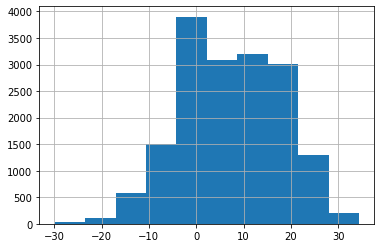

In [8]:
# Гистограмма - график, который показывает, сколько раз встречалось то или иное значние
data['T'].hist()

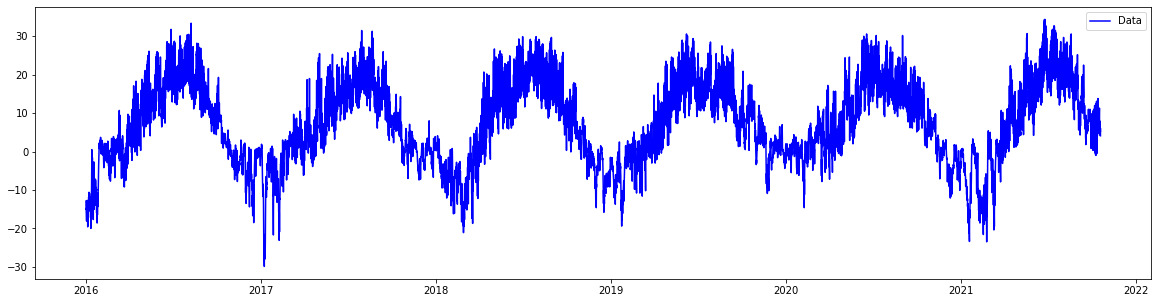

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(data['dates'], data['T'], color='blue', label='Data')
plt.legend()

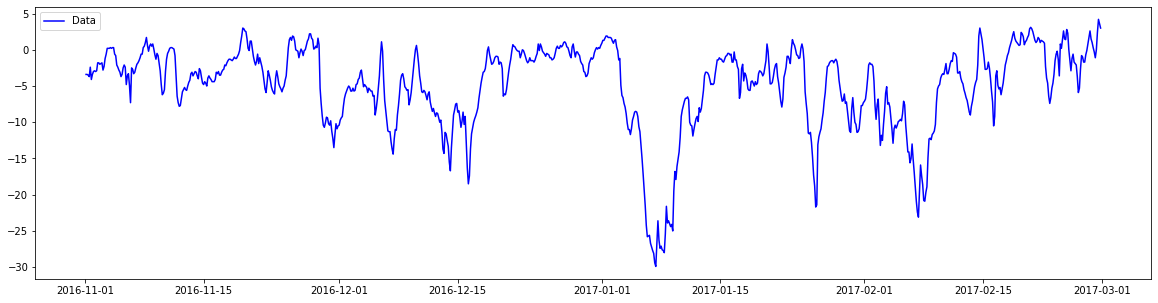

In [10]:
# 1) вариант как можно было делать упражнение 1-го дня:
# data['dates'] > '2016-11-01'
# data['dates'] < '2017-03-01'

condition1 = data['dates'] > '2016-11-01'
data1 = data[condition1]

condition2 = data1['dates'] < '2017-03-01'
data2017 = data1[condition2]

plt.figure(figsize=(20, 5))
plt.plot(data2017['dates'], data2017['T'], color='blue', label='Data')
plt.legend()

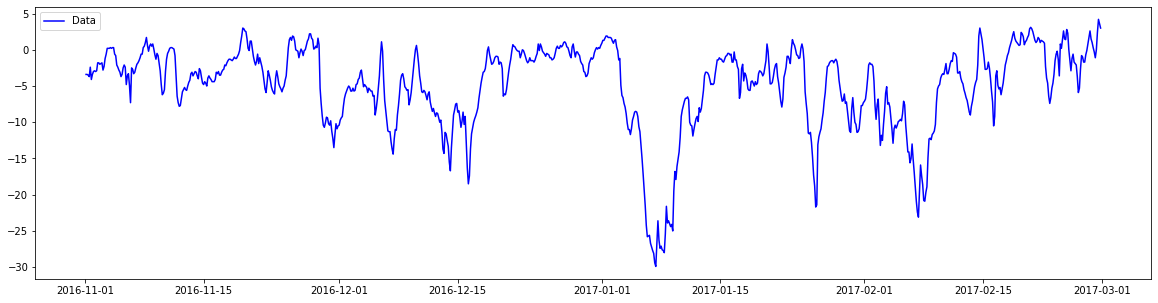

In [11]:
# 2) вариант в одну строку
data2017 = data[(data['dates'] > '2016-11-01') & (data['dates'] < '2017-03-01')]

plt.figure(figsize=(20, 5))
plt.plot(data2017['dates'], data2017['T'], color='blue', label='Data')
plt.legend()

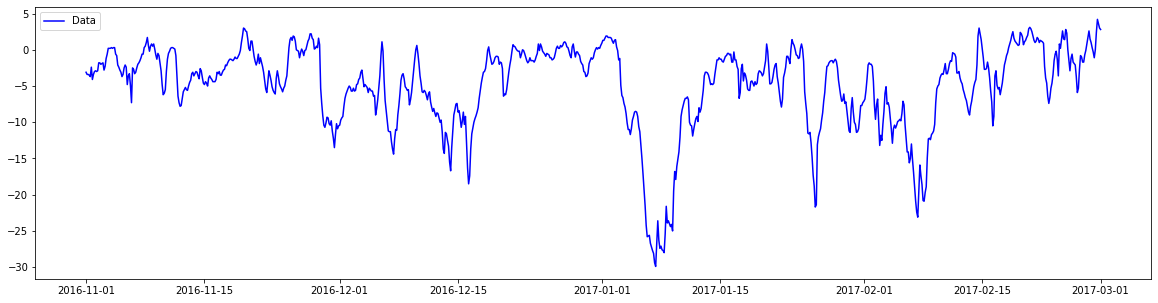

In [12]:
# 3) вариант в одну строку с помощью функции between

data2017 = data[data['dates'].between('2016-11-01', '2017-03-01')]

plt.figure(figsize=(20, 5))
plt.plot(data2017['dates'], data2017['T'], color='blue', label='Data')
plt.legend()

Сегодня мы будем строить прогнозные модели и проверять гиспотезы

# 1 шаг - Разделение данных на train-test

Вначале нужно разбить данные на 2 выборки: на тренировочную (обучающую, train) и тестовую (валидационную, test, val)

На обучающей выборке модель подгоняет свои внутренние параметры с помощью статистики ("обучение", fit)

На тестовой выборке мы тестируем качество модели, на ней она как студент проходит экзамен

Если студент вызубрил ответы, но ничего не понял - точность ответов на тренировочной выборке будет высокой, а на тестовой - очень низкой

In [13]:
# data_train - обучающая выборка
# data_test - тестовая выборка

In [14]:
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

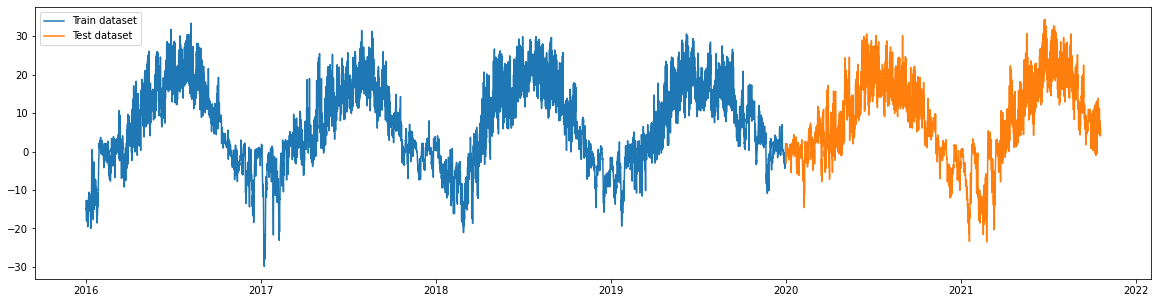

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], data_train['T'], label='Train dataset')
plt.plot(data_test['dates'], data_test['T'], label='Test dataset')
plt.legend()

Хотим прогнозировать температуру в зависимости от дня в году

# 2 шаг - Feature engineering - работа с признаками

Генерируем новые **признаки** (features, "фичи", факторы) и/или преобразуем имеющиеся для прогноза величины

In [16]:
# Создаем новый признак - день в году
data['dayofyear'] = data['dates'].dt.dayofyear
# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

Text(0.5, 1.0, 'График новой фичи "день в году"')

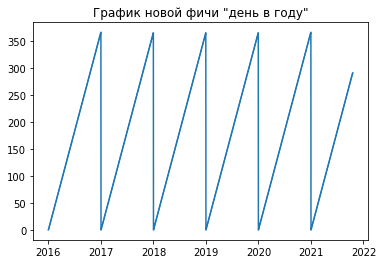

In [17]:
plt.plot(data['dates'], data['dayofyear'])
plt.title('График новой фичи "день в году"')

Text(0.5, 1.0, 'Зависимость температуры от дня в году')

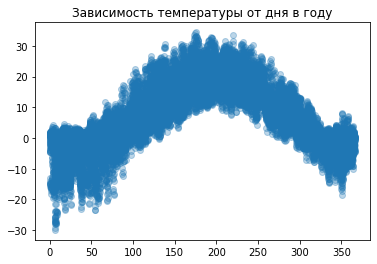

In [18]:
plt.scatter(data['dayofyear'], data['T'], alpha=0.3)  # scatter = точки, а не линия
plt.title('Зависимость температуры от дня в году')

# Линейная регрессия (самая простая модель)

$z = ax+b$

$\sum(y_n - z_n)^2 \rightarrow min$ варьируя a и b


* a и b - **параметры** модели

* y  -  **target** (таргет, целевая переменная) - величина, которую хотим прогнозировать. Ее значения совершенно не обязаны лежать на одной прямой, могут быть случайные отклонения

* X -  **features** (признаки) -  факторы, по которым хотим прогнозировать что-то ($x_1$ - температура,  $x_2$ - давление, и т.п.) Сколько колонок в данных, на основе которых мы хотим делать прогноз - столько иксов и будет в уравнении

Если признаков (иксов) много, линейная модель будет выглядеть так:

$z = a_1 x_1 + a_2 x_2 + ... + b$

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Для того, чтобы обучить модель, нужно разделить выборку 
# на фичи (признаки, features, X) и таргет (целевую переменную, которую прогнозируем, target, y)
# 2 датасета train-test х 2 features-target - создаем 4 переменных: 
# X_train, y_train, X_test, y_test

# Вначале для простототы мы будем делать прогноз только на одном факторе - номере дня в году data['dayofyear']
# Но модель ожидает, что ей на вход придет двумерная таблица - 
# поэтому создаем из колонки date['T'] полноценную таблицу pandas DataFrame

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

# "y" оставляем столбцом, как есть
y_train = data_train['T']
y_test = data_test['T']

Text(0.5, 1.0, 'Зависимость температуры от дня в году')

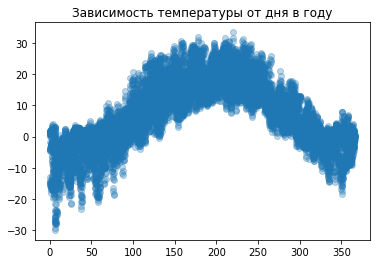

In [21]:
# Scatter - график из точек, а не из линий
plt.scatter(X_train['dayofyear'], y_train, alpha=0.3)  # scatter = точки, а не линия
plt.title('Зависимость температуры от дня в году')

# 1 модель: LinearRegression + dayofyear

In [22]:
# 1 модель: LinearRegression + dayofyear

In [23]:
# Создаем пустой объект со случайными a и b, которые пока не описывают наши данные
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных

# Прогноз на данных, которые модель еще не видела
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [25]:
# Проверяем качество численно

# mean_squared_error - средняя сумма квадратов отклонений (меньше -> лучше)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test) # Чем число меньше - тем лучше

(105.66810600668143, 101.80283625429988)

Ошибка модели на обучающих данных 105.66810600668143
Ошибка модели на тестовых данных 101.80283625429988


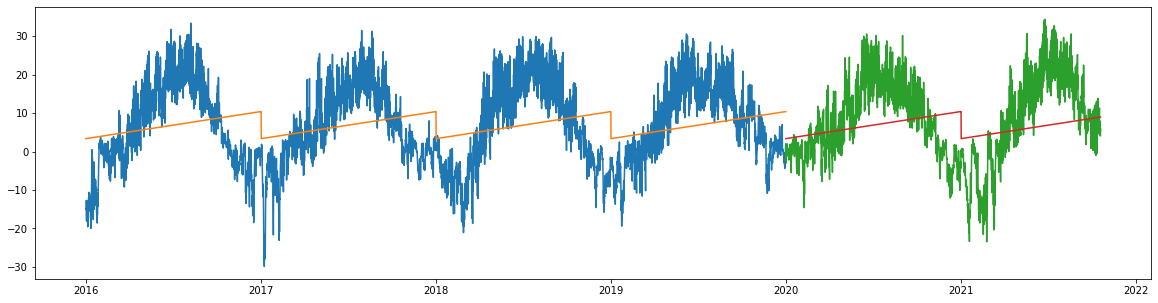

In [51]:
# Собираем все воедино
# 1) LinearRegression + dayofyear
data['dayofyear'] = data['dates'].dt.dayofyear
# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

# Что хочется изменить?
Данные у нас сезонные и плавные, т.е. 1 января почти не отличается от 31 декабря

Линейная регрессия построила прямую линию от 1 до 365 дня в году, которая в среднем получилась возрастающая, из-за этого мы видим некорректное поведение на границах года

# Есть 2 опции: 
1) придумать как изменить признаки для того, чтобы модель стала лучше 

2) использовать другую модель

Начинаем проверять гипотезы

#  *Гипотеза 1: хорошо сработает тригонометрическое преобразование признаков*

In [27]:
# Подключаем пакет numpy для математических функций

import numpy as np

In [28]:
# Посмотрим, в каком диапазоне находятся данные признака dayofyear
data['dayofyear'].min(), data['dayofyear'].max()

(1, 366)

In [29]:
# Перешли к интервалу от 0 до 2pi
# [1, 366] -> [0, 1) -> [0, 2pi)
new_interval = ((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi

In [30]:
new_interval.min(), new_interval.max(), 2 * np.pi

(0.0, 6.26601813420915, 6.283185307179586)

In [31]:
# Вернемся на шаг 1 feature generation - создаем новые признаки:
# scaled_dayofyear - сжимает диапазон [1, 366] -> [0, 2pi] - переходим в радианы
# cos_dayofyear - косинус дня в году (= длина проекции номера дня в году на горизонтальную ось, если нпредставить номера циферблатом)

data['cos_dayofyear'] = np.cos(((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)


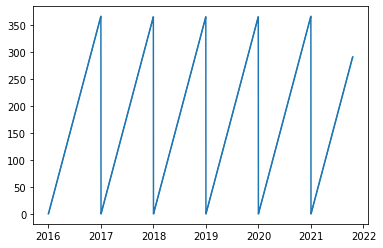

In [32]:
# График исходных данных
plt.plot(data['dates'], data['dayofyear'])

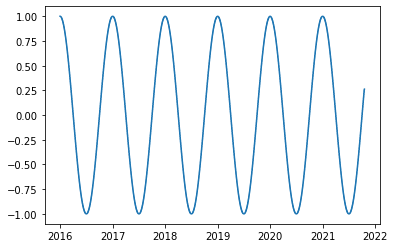

In [33]:
# График, сглаженный тригонометрической функцией
plt.plot(data['dates'], data['cos_dayofyear'])

# 2) LinearRegression + cos dayofyear

Linear Regression на тригонометрических параметрах

$z = a \cos ((x-1) / 366 * 2 \pi) + b$

Ошибка модели на обучающих данных 29.40398343167642
Ошибка модели на тестовых данных 32.54436293526912


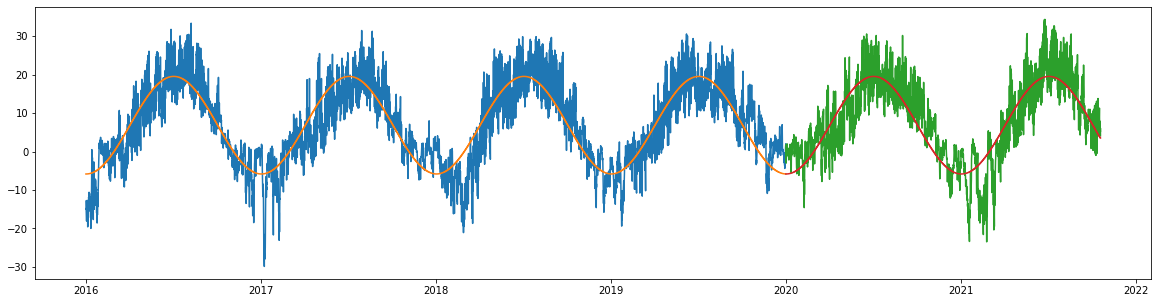

In [34]:
# 2) LinearRegression + cos dayofyear

# Переходим в радианы, создаем новую переменную с cos
data['cos_dayofyear'] = np.cos(((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['cos_dayofyear']  # <- новый признак
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['cos_dayofyear']  # <- новый признак

y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

Гипотеза 2: другая модель сработает лучше

# 3) Decision Tree + dayofyear
http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 

In [35]:
from sklearn.tree import DecisionTreeRegressor

Ошибка модели на обучающих данных 21.154194319706576
Ошибка модели на тестовых данных 33.51912358761173


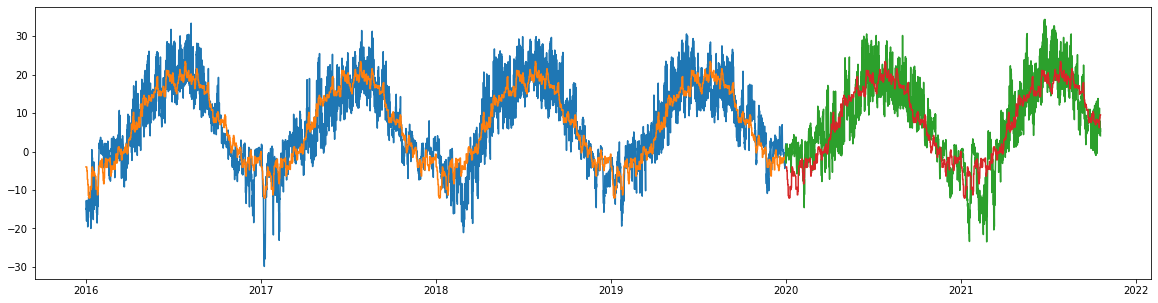

In [36]:
# 3) Decision Tree + dayofyear

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']  # <- старый признак
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']  # <- старый признак

y_train = data_train['T']
y_test = data_test['T']

model = DecisionTreeRegressor()  # <- новая модель 
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

Исправляем переобучение - задаем модели ограничения, чтобы она стала проще и не смогла зубрить

В случае дерева мы можем играть с глубиной max_depth / количеством листьев

# 4) Decision Tree + dayofyear + настройка параметров

Ошибка модели на обучающих данных 23.238699638200927
Ошибка модели на тестовых данных 32.66602103239761


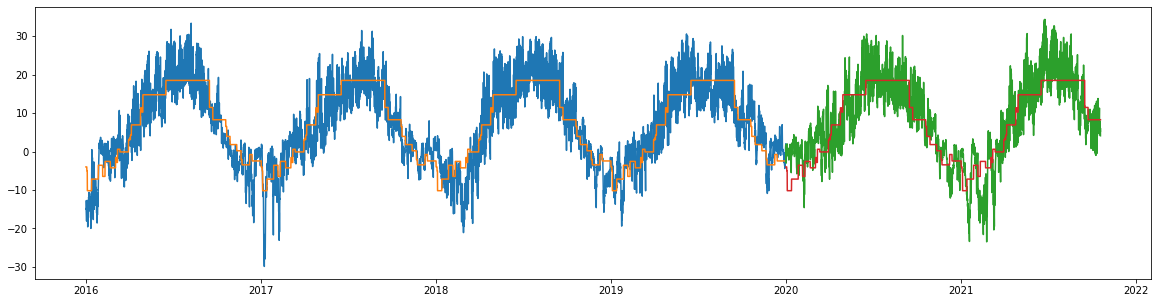

In [37]:
# 4) Decision Tree + dayofyear + настройка параметров

# Мы смогли уменьшить ошибку за счет того, что запретили дереву зубрить

# 3) Decision Tree + dayofyear

# 3) Decision Tree + dayofyear

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_train['XXX'] = data_train['XXX']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_test['XXX'] = data_test['XXX']  

y_train = data_train['T']
y_test = data_test['T']

model = DecisionTreeRegressor(max_depth=5)  # <- новая модель + параметр
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

Ошибка модели на обучающих данных 71.93422368384626
Ошибка модели на тестовых данных 69.05097864242857


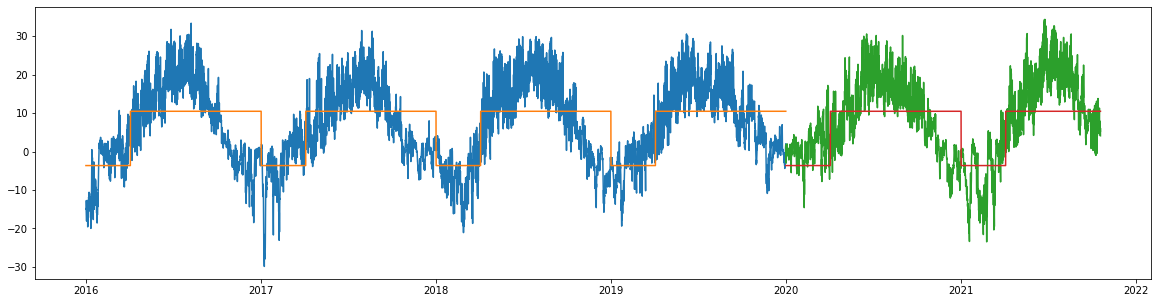

In [38]:
# 4) Decision Tree + dayofyear + настройка параметров

# Мы смогли уменьшить ошибку за счет того, что запретили дереву зубрить

# 3) Decision Tree + dayofyear

# 3) Decision Tree + dayofyear

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_train['XXX'] = data_train['XXX']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_test['XXX'] = data_test['XXX']  

y_train = data_train['T']
y_test = data_test['T']

model = DecisionTreeRegressor(max_depth=1)  # <- новая модель + параметр
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

Ошибка модели на обучающих данных 36.72633485819912
Ошибка модели на тестовых данных 45.33344462217573


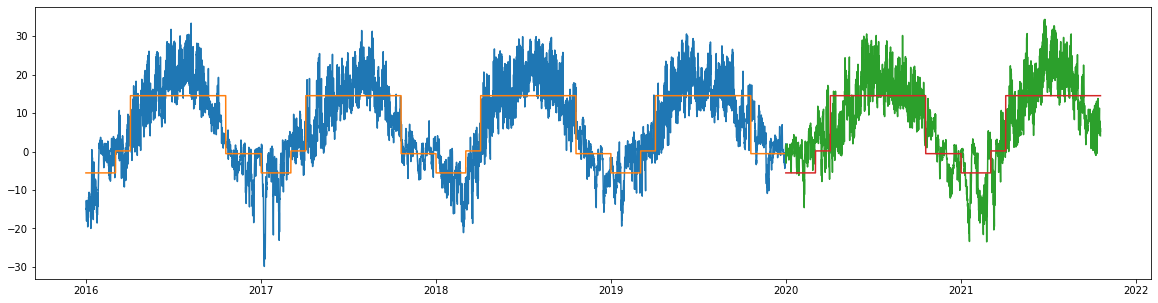

In [39]:
# 4) Decision Tree + dayofyear + настройка параметров

# Мы смогли уменьшить ошибку за счет того, что запретили дереву зубрить

# 3) Decision Tree + dayofyear

# 3) Decision Tree + dayofyear

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_train['XXX'] = data_train['XXX']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_test['XXX'] = data_test['XXX']  

y_train = data_train['T']
y_test = data_test['T']

model = DecisionTreeRegressor(max_depth=2)  # <- новая модель + параметр
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

Ошибка модели на обучающих данных 30.781142258723516
Ошибка модели на тестовых данных 39.13185682786822


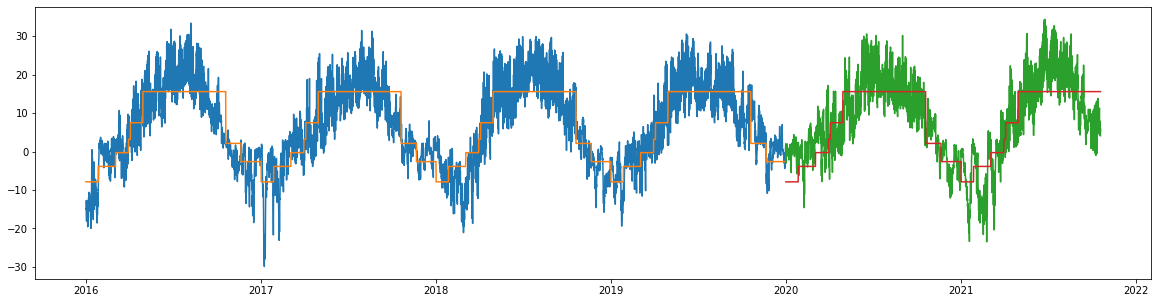

In [40]:
# 4) Decision Tree + dayofyear + настройка параметров

# Мы смогли уменьшить ошибку за счет того, что запретили дереву зубрить

# 3) Decision Tree + dayofyear

# 3) Decision Tree + dayofyear

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_train['XXX'] = data_train['XXX']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']  # <- старый признак
# Можно добавить больше признаков
# X_test['XXX'] = data_test['XXX']  

y_train = data_train['T']
y_test = data_test['T']

model = DecisionTreeRegressor(max_depth=3)  # <- новая модель + параметр
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
print('Ошибка модели на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели на тестовых данных', mean_squared_error(y_test, pred_test))

Ошибка модели sin на обучающих данных 105.70138724524625
Ошибка модели sin на тестовых данных 102.52245924299098


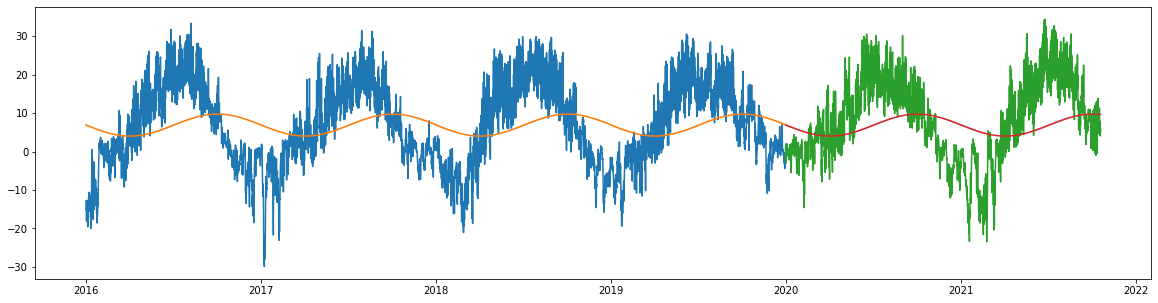

In [41]:
# модель (sin)

data['sin_dayofyear'] = np.sin(((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)

# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['sin_dayofyear']  # <- новый признак
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['sin_dayofyear']  # <- новый признак

y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

print('Ошибка модели sin на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели sin на тестовых данных', mean_squared_error(y_test, pred_test))
# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
# Ошибка модели на обучающих данных 23.238699638200927
# Ошибка модели на тестовых данных 32.66602103239761
# Ошибка модели DecisionTreeRegressor + cos(день в году) на обучающих данных 28.37804968032398
# Ошибка модели DecisionTreeRegressor + cos(день в году)на тестовых данных 33.929295474403666

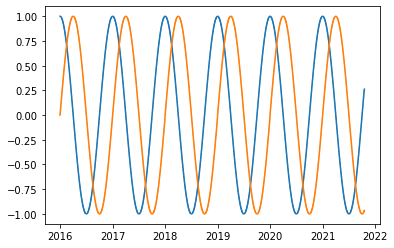

In [42]:
plt.plot(data['dates'], data['cos_dayofyear'])
plt.plot(data['dates'], data['sin_dayofyear'])

Ошибка модели cos & sin на обучающих данных 25.293104204282933
Ошибка модели cos & sin на тестовых данных 27.88086367421291


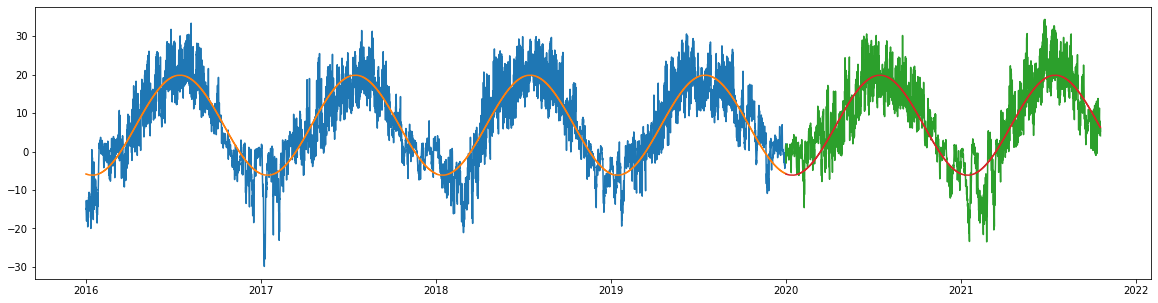

In [43]:
# модель (cos & sin)

data['cos_dayofyear'] = np.cos (((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)
data['sin_dayofyear'] = np.sin (((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)
# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear'] 
X_train['sin_dayofyear'] = data_train['sin_dayofyear'] # <- новый признак
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear'] 
X_test['sin_dayofyear'] = data_test['sin_dayofyear']  # <- новый признак

y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

print('Ошибка модели cos & sin на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели cos & sin на тестовых данных', mean_squared_error(y_test, pred_test))
# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
# Ошибка модели на обучающих данных 23.238699638200927
# Ошибка модели на тестовых данных 32.66602103239761
# Ошибка модели DecisionTreeRegressor + cos(день в году) на обучающих данных 28.37804968032398
# Ошибка модели DecisionTreeRegressor + cos(день в году)на тестовых данных 33.929295474403666
# Ошибка модели sin на обучающих данных 105.70138724524625
# Ошибка модели sin на тестовых данных 102.52245924299098

Ошибка модели cos & dayofyear на обучающих данных 25.67994218885138
Ошибка модели cos & dayofyear на тестовых данных 30.65966848352642


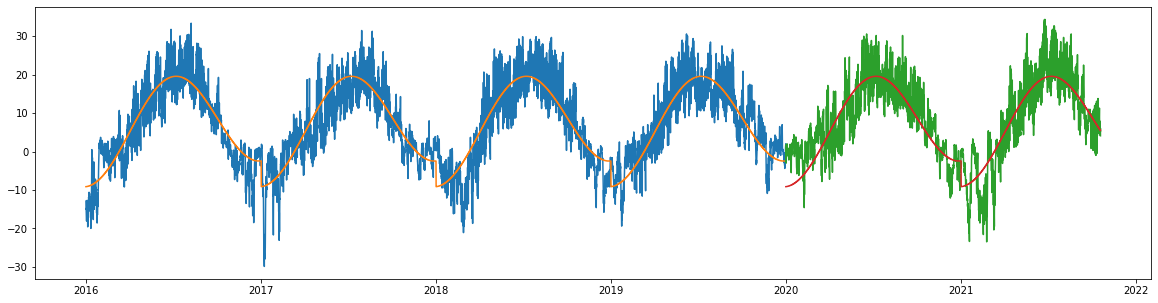

In [44]:
# модель (dayofyear & cos_dayofyear)

data['cos_dayofyear'] = np.cos (((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)
data['sin_dayofyear'] = np.sin (((data['dayofyear'] - 1) / (365+1)) * 2 * np.pi)
# Повторяем все то же самое
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear'] 
X_train['cos_dayofyear'] = data_train['cos_dayofyear'] # <- новый признак
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear'] 
X_test['cos_dayofyear'] = data_test['cos_dayofyear']  # <- новый признак

y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], y_train)
plt.plot(data_train['dates'], pred_train)
plt.plot(data_test['dates'], y_test)
plt.plot(data_test['dates'], pred_test)

print('Ошибка модели cos & dayofyear на обучающих данных', mean_squared_error(y_train, pred_train))
print('Ошибка модели cos & dayofyear на тестовых данных', mean_squared_error(y_test, pred_test))
# Ошибка ЛинРег на cos на обучающих данных 29.40398343167642
# Ошибка ЛинРег на cos на тестовых данных 32.54436293526912
# Ошибка DecisionTreeRegressor на обучающих данных 21.154194319706576
# Ошибка DecisionTreeRegressor на тестовых данных 33.51912358761173
# Ошибка модели на обучающих данных 23.238699638200927
# Ошибка модели на тестовых данных 32.66602103239761
# Ошибка модели DecisionTreeRegressor + cos(день в году) на обучающих данных 28.37804968032398
# Ошибка модели DecisionTreeRegressor + cos(день в году)на тестовых данных 33.929295474403666
# Ошибка модели sin на обучающих данных 105.70138724524625
# Ошибка модели sin на тестовых данных 102.52245924299098

In [50]:
y_train.head(50)

5254    2.0
5255    1.8
5256    1.4
5257    1.4
5258    1.1
5259    0.5
5260   -0.2
5261   -0.4
5262   -0.6
5263   -1.7
5264   -3.0
5265   -3.4
5266   -3.7
5267   -3.6
5268   -3.7
5269   -3.5
5270   -4.0
5271   -4.4
5272   -3.5
5273   -3.6
5274   -3.5
5275   -3.4
5276   -2.9
5277   -2.3
5278   -1.3
5279   -0.7
5280   -0.3
5281   -0.7
5282   -1.2
5283   -2.6
5284   -2.9
5285   -2.3
5286   -1.1
5287   -0.6
5288   -0.4
5289   -0.4
5290   -0.4
5291   -0.6
5292   -0.9
5293   -0.8
5294   -0.8
5295   -0.6
5296   -0.2
5297   -0.3
5298   -0.2
5299    0.3
5300    0.2
5301    0.0
5302    0.3
5303    0.2
Name: T, dtype: float64